In [54]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# extract all radicals from the radical.txt
def get_radicals(path):

  f = open(path,"r")
  lines = f.readlines()

  each_char = []
  radicals = []

  for x in lines:
      each_char.append(x.split('	')[0])
      radicals.append(x.split('	')[4])

  f.close()

  radical_dict = dict(zip(each_char, radicals))

  return radical_dict

radical_path = '/content/drive/MyDrive/Thesis/Glyph-based_resources/radical.txt'

radical_dict = get_radicals(radical_path)

In [56]:
import re

def chars_convert(texts1, texts2):

  # convert texts1 into radicals
  for index, text in enumerate(texts1):
    # remove the redunt category names in the file
    # text = re.sub(r'\s*[A-Za-z]+\b|[\s+\>\<\:\?\.\!\/_,$%^*\\;[\]{\}(+\"\']+|[+——！，。？、~@#￥%……&*（）！，❤。～《》：（）【】「」？”“；：、【】╮╯▽╰╭★→「」]', '' , text)
    # text = text.rstrip()
    cn = [one for one in text]
    for i, char in enumerate(cn):
      if char in radical_dict.keys():
        cn[i] = radical_dict[char]
      else:
        # cn[i] = ''
        continue
    texts1[index] = str(cn)

  # convert texts2 into radicals
  for index, text in enumerate(texts2):
    # text = re.sub(r'\s*[A-Za-z]+\b|[\s+\>\<\:\?\.\!\/_,$%^*\\;[\]{\}(+\"\']+|[+——！，。？、~@#￥%……&*（）！，❤。～《》：（）【】「」？”“；：、【】╮╯▽╰╭★→「」]', '' , text)
    # text = text.rstrip()
    cn = [one for one in text]
    for i, char in enumerate(cn):
      if char in radical_dict.keys():
        cn[i] = radical_dict[char]
      else:
        # cn[i] = ''
        continue
    texts2[index] = str(cn)

  return texts1, texts2

In [57]:
import re

test = '"[{\'tweet_content\': \'有点累想休息了\', \'posting_time\': \'2019-11-19 18:09:21\','
result = re.findall(r'\[{\'tweet_content\': \'(.*?)\'', test, re.DOTALL)
# print(result)


In [58]:
from posixpath import split
import pandas as pd
import re
import csv
import random

def get_all_posts(path1, path2):

  depfile = open(path1)
  normfile = open(path2)

  csvreader_dep = csv.reader(depfile)
  next(csvreader_dep, None)  # skip the headers
  csvreader_norm = csv.reader(normfile)
  next(csvreader_norm, None) 

  dep_rows = []
  norm_rows = []
  for row in csvreader_dep:
    # remove all the other features, only use the post content
    row1 = re.findall(r'\'tweet_content\': \'(.*?)\'', str(row), re.DOTALL)
    dep_rows.append(str(row1))
   

  for row in csvreader_norm:
    row1 = re.findall(r'\'tweet_content\': \'(.*?)\'', str(row), re.DOTALL)
    norm_rows.append(str(row1))

  random.seed(0)

  dep_row = random.sample(dep_rows, 1500)
  norm_row = random.sample(norm_rows, 1500)

  dep_posts = []
  norm_posts = []
  
  dep_posts, norm_posts = chars_convert(dep_row, norm_row)
  # print(dep_posts, norm_posts)
  for i, eachone in enumerate(dep_posts):  
    eachone = list(filter(lambda w: not re.match(r'\s*[A-Za-z]+\b|[\s+\>\<\:\?\.\!\/_,$%^*\\;[\]{\}(+\"\']', w), eachone))
    dep_posts[i] = str(eachone)
  for i, eachone in enumerate(norm_posts):  
    eachone = list(filter(lambda w: not re.match(r'\s*[A-Za-z]+\b|[\s+\>\<\:\?\.\!\/_,$%^*\\;[\]{\}(+\"\']', w), eachone))
    norm_posts[i] = str(eachone)
  # print(dep_row[:5])

  return dep_row, norm_row # Due to the files are too large, this step reducse the size of data for the following compile works

In [59]:
# data paths determined
path = "/content/drive/MyDrive/Thesis/Weibo/"
path1 = path + "depressed.csv"
path2 = path + "normal.csv"


In [60]:
# get all posts
dep_posts, normal_posts = get_all_posts(path1, path2)
print(len(dep_posts), len(normal_posts))


1500 1500


In [61]:
new_dep_posts = dep_posts[:900]
new_normal_posts = normal_posts[:900]
all_labels = ['norm']*900 + ['dep']*900 
all_posts = new_normal_posts + new_dep_posts 

vali_X = normal_posts[900:1000] + dep_posts[900:1000] # altogether 200 posts in validation set
vali_Y = ['norm']*100 + ['dep']*100 
print(vali_X[:3])
print(vali_Y[:3])
test_X = normal_posts[1000:1500] + dep_posts[1000:1500] # altogether 1000 posts in test set
test_Y = ['norm']*500 + ['dep']*500 

["['丷', '一', '月', '刀', '天', '口', '囗', '大', '心', '日', '上', '8', '1', '口', '儿', '禾', '丷', '口', '儿', '广', '卜', '口', '8', '1', '6', '丨', '土', '手', '丁', '手', '斤', '我', '又', '貝', '攵', '了', '一', '口', '八', '白', '勹', '丶', '辰', '口', '釆', '由', '0', '9', '口', '丂', '亡', '目', '乛', '头', '羊', '目', '8', '1', '彐', '心', '口', '麻', '心', '艹', '亡', '川', '白', '勹', '丶', '人', '十', '口', '攵', '了', '卜', '口', '火', '工', '力', '言', '果', '亠', '口', '小', '尤', '下', '单', '了', '厂', '一', '口', '戈', '心', '8', '2', '2', '冖', '見', '至', '刀', '亻', '匕', '貝', '白', '勹', '丶', '言', '千', '口', '儿', '厶', '儿', '水', '艹', '两', '未', '矢', '口', '乂', '8', '1', '6', '巾', '亡', '月', '壬', '产', '彡', '頁', '8', '1', '巴', '人', '云', '女', '子', '8', '2', '6', '目', '人', '十', '口', '言', '十', '人', '云', '彳', '艮', '久', '才', '发', '亻', '匕', '貝', '竹', '士', '寸', '彳', '士', '寸', '亠', '口', '冂', '口', 'ツ', '一', '八', '5', '月', '5', '日', '土', '厶', '犭', '王', '辵', '了', '木', '十', '具', '牛', '勿', '囗', '二', '儿', '小', '丁', '口', '爪', '冖', '8', '1', '6', '又', '人', '衣', '丨', '日', '十

In [62]:
print(len(all_posts), len(test_X))

1800 1000


In [63]:
import pandas as pd

df = pd.DataFrame(list(zip(all_posts, all_labels)),
              columns=['sentences','label_desc'])

In [64]:
vali_df = pd.DataFrame(list(zip(vali_X, vali_Y)),
              columns=['sentences','label_desc'])

test_df = pd.DataFrame(list(zip(test_X, test_Y)),
              columns=['sentences','label_desc'])

new_df = pd.concat([df, vali_df, test_df], axis=0)

col = ['label_desc', 'sentences']
new_df = new_df[col]
new_df = new_df[pd.notnull(new_df['sentences'])]
new_df.columns = ['label_desc', 'sentences']
new_df['category_id'] = new_df['label_desc'].factorize()[0]

category_id_df = new_df[['label_desc', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label_desc']].values)
new_df.head()

df = new_df[:1800]
vali_df = new_df[1800:2000] # altogether 200 posts in validation set
test_df = new_df[2000:3000] # altogether 1000 posts in test set

test_df.head()

,label_desc,sentences,category_id
0,norm,"['为', '文', '刀', '永', '乐', '老', '匕', '丨', '丿', ...",0
1,norm,"['人', '云', '言', '丷', '口', '儿', '言', '千', '口', ...",0
2,norm,"['我', '乂', '8', '1', '6', '巾', '亡', '月', '壬', ...",0
3,norm,"['今', '天', '日', '一', '走', '我', '白', '勹', '丶', ...",0
4,norm,"['无', '无', '无', '矢', '豆', '其', '月', '六', '乂', ...",0


In [65]:
### Defining the model and tuning process ###

from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support, accuracy_score,recall_score,precision_score,f1_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid

def SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test):

    clf = LinearSVC()

    best_score = 0
    # defining parameter range
    grid = {
            'C': [0.001, 0.1, 1, 10, 25, 50, 100], 
            
        }
    paramGrid = ParameterGrid(grid)
    for params in paramGrid:
            clf.set_params(**params)
            clf.fit(X_train, y_train)
            # PREDICT VALUE BASED ON UPDATED PARAMETERS
            y_vali_result = clf.predict(vali_X)
            f1 = f1_score(vali_Y,y_vali_result)
            if f1 > best_score:
                  best_score = f1
                  best_grid = params
    print(type(y_vali_result))
    print(type(vali_X))

    print("Best score: ", best_score )
    print("Grid:", best_grid)
    # # NEW MODEL EVALUATION METRICS 
    t = LinearSVC()
    model = t.set_params(**best_grid)
    model.fit(X_train,y_train)
    # print(type(test_X))
    y_pred_test = model.predict(X_test)
    print(type(y_pred_test))
    print(type(y_test))
    print("####################################")
    print("By using SVC model, the best parameter and its evaluation metrics are:")
    accuracy = accuracy_score(y_test,y_pred_test)
    precision = precision_score(y_test,y_pred_test)
    recall = recall_score(y_test,y_pred_test)
    f1 = f1_score(y_test,y_pred_test)
    print('Best parameters: ' + str(model))
    print('Accuracy Score : ' + str(accuracy))
    print('Precision Score : ' + str(precision))
    print('Recall Score : ' + str(recall))
    print('F1 Score : ' + str(f1))
    return f1



In [66]:
# remove the label which has the least samples, then increase the size of dataframe by 100 per group
# then randomly select same amount of samples from the left categories

df_10 = df.sample(n = 10, random_state = 2)
df_20 = df.sample(n = 20, random_state = 2)
df_30 = df.sample(n = 30, random_state = 2)
df_40 = df.sample(n = 40, random_state = 2)
df_50 = df.sample(n = 50, random_state = 2)
df_60 = df.sample(n = 60, random_state = 2)
df_70 = df.sample(n = 70, random_state = 2)
df_80 = df.sample(n = 80, random_state = 2)
df_90 = df.sample(n = 90, random_state = 2)
df_100 = df.sample(n = 100, random_state = 2)
df_200 = df.sample(n = 200, random_state = 2)
df_300 = df.sample(n = 300, random_state = 2)
df_400 = df.sample(n = 400, random_state = 2)
df_500 = df.sample(n = 500, random_state = 2)
df_600 = df.sample(n = 600, random_state = 2)
df_700 = df.sample(n = 700, random_state = 2)
df_800 = df.sample(n = 800, random_state = 2)
df_900 = df.sample(n = 900, random_state = 2)
df_1800 = df

print(df_70.groupby('label_desc').size())
print(df_10.head())

label_desc
dep     41
norm    29
dtype: int64
     label_desc                                          sentences  \
1676        dep  ['8', '2', '2', '彐', '又', '8', '1', '6', '月', ...   
1528        dep  ['冂', '土', '口', '年', '广', '大', '白', '方', '攵', ...   
464        norm  ['手', '尸', '十', '口', '言', '丷', '口', '儿', '文', ...   
1589        dep  ['车', '辵', '阜', '丁', '口', '人', '尹', '其', '斤', ...   
1716        dep  ['日', '一', '走', '丶', '艮', '艸', '纟', '勹', '丶', ...   

      category_id  
1676            1  
1528            1  
464             0  
1589            1  
1716            1  


In [67]:
########################### Data Size = 10 ##################################

dep     7
norm    3
Name: label_desc, dtype: int64


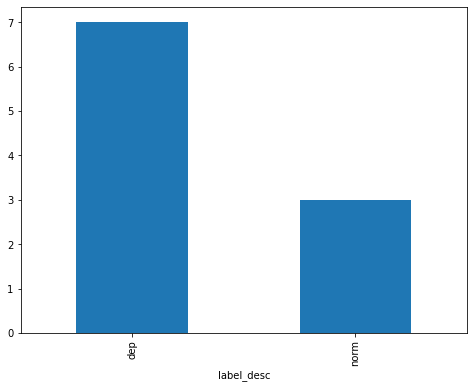

In [68]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_10.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_10['label_desc'].value_counts())
plt.show()

In [69]:
df_0 = pd.concat([df_10, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1210, 45511)

In [70]:
X_train = features[:10]
vali_X = features[10:210]
y_train = labels[:10]
vali_Y = labels[10:210]
X_test = features[210:]
y_test = labels[210:]
print(type(X_test))

f1_10 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.6711409395973155
Grid: {'C': 100}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=100)
Accuracy Score : 0.506
Precision Score : 0.5030181086519114
Recall Score : 1.0
F1 Score : 0.6693440428380187


In [71]:
########################### Data Size = 20 ##################################

dep     12
norm     8
Name: label_desc, dtype: int64


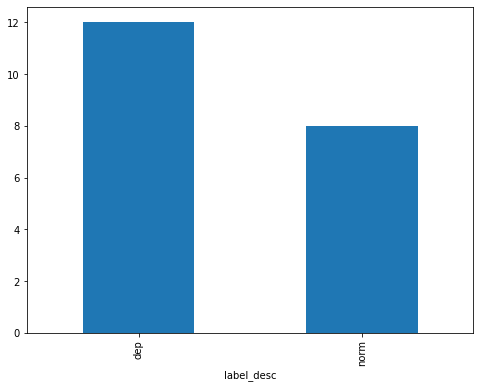

In [72]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_20.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_20['label_desc'].value_counts())
plt.show()

In [73]:
df_0 = pd.concat([df_20, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1220, 45719)

In [74]:
X_train = features[:20]
vali_X = features[20:220] # altogether 200 posts in validation set
y_train = labels[:20]
vali_Y = labels[20:220]
X_test = features[220:]
y_test = labels[220:]
# print(type(X_test))

f1_20 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.704225352112676
Grid: {'C': 25}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=25)
Accuracy Score : 0.58
Precision Score : 0.5435729847494554
Recall Score : 0.998
F1 Score : 0.7038081805359663


In [75]:
########################### Data Size = 30 ##################################

dep     17
norm    13
Name: label_desc, dtype: int64


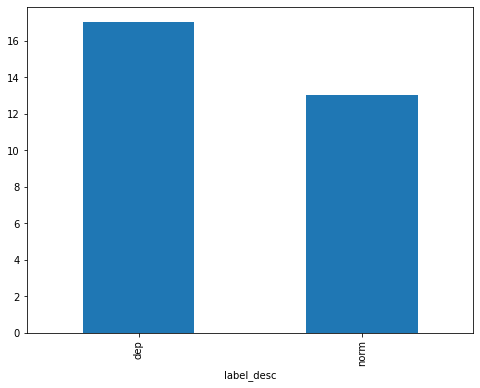

In [76]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_30.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_30['label_desc'].value_counts())
plt.show()

In [77]:
df_0 = pd.concat([df_30, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1230, 45828)

In [78]:
X_train = features[:30]
vali_X = features[30:230] # altogether 200 posts in validation set
y_train = labels[:30]
vali_Y = labels[30:230]
X_test = features[230:]
y_test = labels[230:]
# print(type(X_test))

f1_30 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.8016194331983807
Grid: {'C': 50}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=50)
Accuracy Score : 0.779
Precision Score : 0.7007194244604317
Recall Score : 0.974
F1 Score : 0.8150627615062761


In [79]:
########################### Data Size = 400 ##################################

dep     24
norm    16
Name: label_desc, dtype: int64


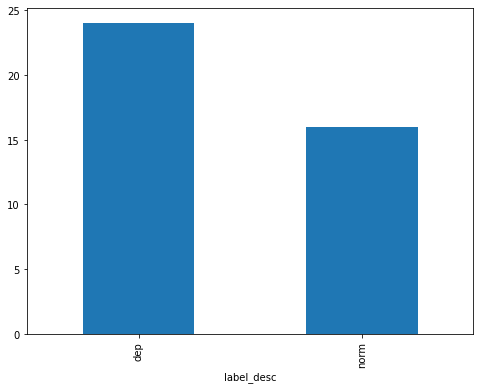

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_40.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_40['label_desc'].value_counts())
plt.show()

In [81]:
df_0 = pd.concat([df_40, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1240, 45883)

In [82]:
X_train = features[:40]
vali_X = features[40:240] # altogether 200 posts in validation set
y_train = labels[:40]
vali_Y = labels[40:240]
X_test = features[240:]
y_test = labels[240:]
# print(type(X_test))

f1_40 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.7888446215139443
Grid: {'C': 25}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=25)
Accuracy Score : 0.744
Precision Score : 0.6662125340599455
Recall Score : 0.978
F1 Score : 0.792544570502431


In [83]:
########################### Data Size = 50 ##################################

dep     29
norm    21
Name: label_desc, dtype: int64


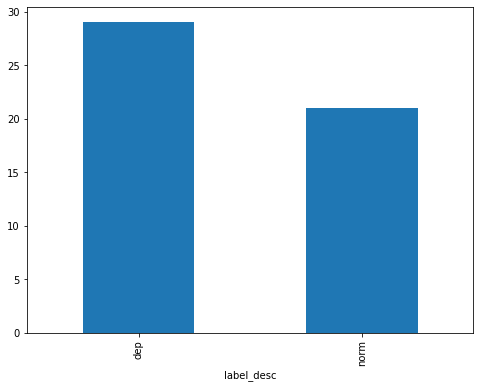

In [84]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_50.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_50['label_desc'].value_counts())
plt.show()

In [85]:
df_0 = pd.concat([df_50, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1250, 46068)

In [86]:
X_train = features[:50]
vali_X = features[50:250] # altogether 200 posts in validation set
y_train = labels[:50]
vali_Y = labels[50:250]
X_test = features[250:]
y_test = labels[250:]
# print(type(X_test))

f1_50 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.8584070796460176
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.843
Precision Score : 0.777059773828756
Recall Score : 0.962
F1 Score : 0.8596961572832886


In [87]:
########################### Data Size = 60 ##################################

dep     35
norm    25
Name: label_desc, dtype: int64


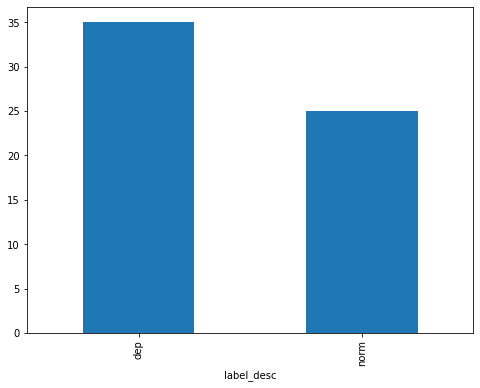

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_60.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_60['label_desc'].value_counts())
plt.show()

In [89]:
df_0 = pd.concat([df_60, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1260, 46250)

In [90]:
X_train = features[:60]
vali_X = features[60:260] # altogether 200 posts in validation set
y_train = labels[:60]
vali_Y = labels[60:260]
X_test = features[260:]
y_test = labels[260:]
# print(type(X_test))

f1_60 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.8663594470046083
Grid: {'C': 25}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=25)
Accuracy Score : 0.877
Precision Score : 0.8255613126079447
Recall Score : 0.956
F1 Score : 0.8860055607043559


In [91]:
########################### Data Size = 70 ##################################

dep     41
norm    29
Name: label_desc, dtype: int64


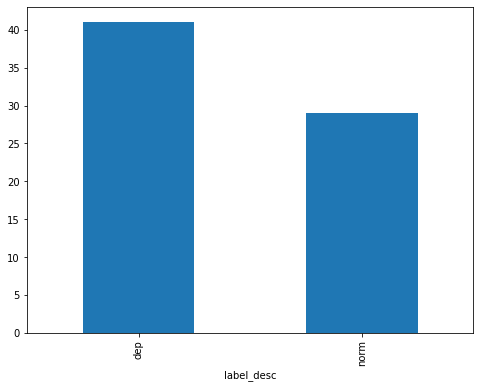

In [92]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_70.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_70['label_desc'].value_counts())
plt.show()

In [93]:
df_0 = pd.concat([df_70, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1270, 46387)

In [94]:
X_train = features[:70]
vali_X = features[70:270] # altogether 200 posts in validation set
y_train = labels[:70]
vali_Y = labels[70:270]
X_test = features[270:]
y_test = labels[270:]
# print(type(X_test))

f1_70 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.8857142857142858
Grid: {'C': 50}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=50)
Accuracy Score : 0.888
Precision Score : 0.8439716312056738
Recall Score : 0.952
F1 Score : 0.8947368421052632


In [95]:
########################### Data Size = 80 ##################################

dep     47
norm    33
Name: label_desc, dtype: int64


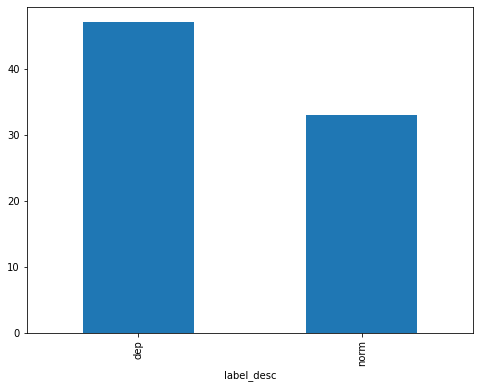

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_80.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_80['label_desc'].value_counts())
plt.show()

In [97]:
df_0 = pd.concat([df_80, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1280, 46536)

In [98]:
X_train = features[:80]
vali_X = features[80:280] # altogether 200 posts in validation set
y_train = labels[:80]
vali_Y = labels[80:280]
X_test = features[280:]
y_test = labels[280:]
# print(type(X_test))

f1_80 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.8899521531100477
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.888
Precision Score : 0.8464285714285714
Recall Score : 0.948
F1 Score : 0.8943396226415093


In [99]:
########################### Data Size = 90 ##################################

dep     52
norm    38
Name: label_desc, dtype: int64


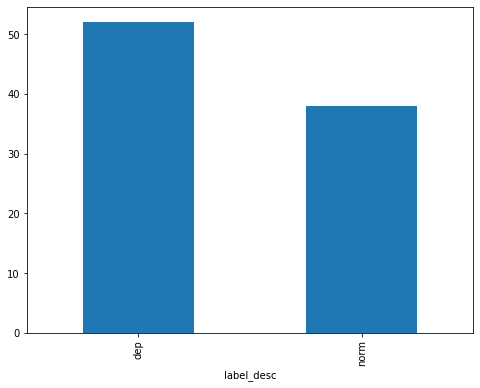

In [100]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_90.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_90['label_desc'].value_counts())
plt.show()

In [101]:
df_0 = pd.concat([df_90, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1290, 46655)

In [102]:
X_train = features[:90]
vali_X = features[90:290] # altogether 200 posts in validation set
y_train = labels[:90]
vali_Y = labels[90:290]
X_test = features[290:]
y_test = labels[290:]
# print(type(X_test))

f1_90 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.9073170731707316
Grid: {'C': 50}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=50)
Accuracy Score : 0.901
Precision Score : 0.8719851576994434
Recall Score : 0.94
F1 Score : 0.9047160731472571


In [103]:
########################### Data Size = 100 ##################################

dep     56
norm    44
Name: label_desc, dtype: int64


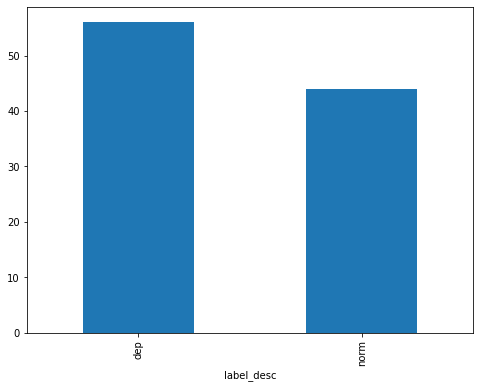

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_100.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_100['label_desc'].value_counts())
plt.show()

In [105]:
df_0 = pd.concat([df_100, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1300, 46814)

In [106]:
X_train = features[:100]
vali_X = features[100:300] # altogether 200 posts in validation set
y_train = labels[:100]
vali_Y = labels[100:300]
X_test = features[300:]
y_test = labels[300:]
# print(type(X_test))

f1_100 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.911764705882353
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.902
Precision Score : 0.8778195488721805
Recall Score : 0.934
F1 Score : 0.9050387596899225


In [107]:
########################### Data Size = 200 ##################################

dep     107
norm     93
Name: label_desc, dtype: int64


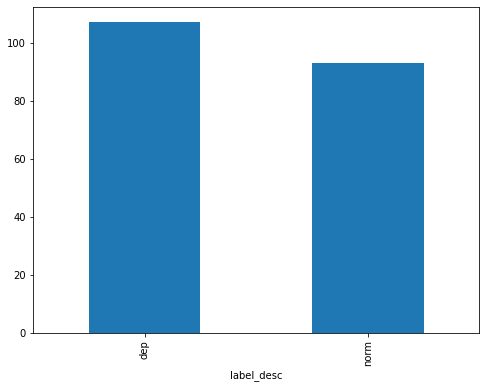

In [108]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_200.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_200['label_desc'].value_counts())
plt.show()

In [109]:
df_0 = pd.concat([df_200, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1400, 48320)

In [110]:
X_train = features[:200]
vali_X = features[200:400] # altogether 200 posts in validation set
y_train = labels[:200]
vali_Y = labels[200:400]
X_test = features[400:]
y_test = labels[400:]
# print(type(X_test))

f1_200 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.9387755102040817
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.921
Precision Score : 0.9304703476482618
Recall Score : 0.91
F1 Score : 0.9201213346814965


In [111]:
########################### Data Size = 300 ##################################

dep     159
norm    141
Name: label_desc, dtype: int64


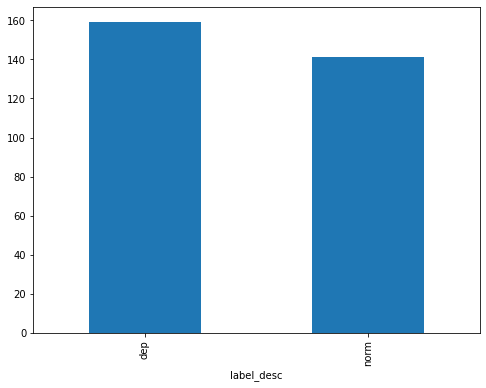

In [112]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_300.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_300['label_desc'].value_counts())
plt.show()

In [113]:
df_0 = pd.concat([df_300, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1500, 49586)

In [114]:
X_train = features[:300]
vali_X = features[300:500] # altogether 200 posts in validation set
y_train = labels[:300]
vali_Y = labels[300:500]
X_test = features[500:]
y_test = labels[500:]
# print(type(X_test))

f1_300 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.9381443298969071
Grid: {'C': 1}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=1)
Accuracy Score : 0.931
Precision Score : 0.9461697722567288
Recall Score : 0.914
F1 Score : 0.9298067141403867


In [115]:
########################### Data Size = 400 ##################################

dep     204
norm    196
Name: label_desc, dtype: int64


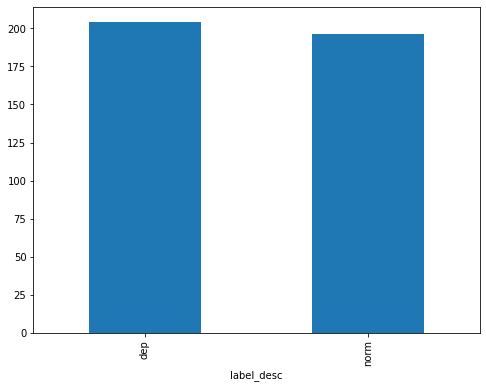

In [116]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_400.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_400['label_desc'].value_counts())
plt.show()

In [117]:
df_0 = pd.concat([df_400, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1600, 50788)

In [118]:
X_train = features[:400]
vali_X = features[400:600] # altogether 200 posts in validation set
y_train = labels[:400]
vali_Y = labels[400:600]
X_test = features[600:]
y_test = labels[600:]
# print(type(X_test))

f1_400 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.9381443298969071
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.938
Precision Score : 0.9620253164556962
Recall Score : 0.912
F1 Score : 0.9363449691991785


In [119]:
########################### Data Size = 500 ##################################

norm    252
dep     248
Name: label_desc, dtype: int64


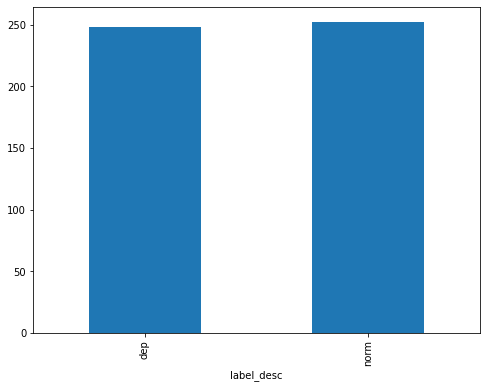

In [120]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_500.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_500['label_desc'].value_counts())
plt.show()

In [121]:
df_0 = pd.concat([df_500, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1700, 52269)

In [122]:
X_train = features[:500]
vali_X = features[500:700] # altogether 200 posts in validation set
y_train = labels[:500]
vali_Y = labels[500:700]
X_test = features[700:]
y_test = labels[700:]
# print(type(X_test))

f1_500 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.9381443298969071
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.94
Precision Score : 0.9621848739495799
Recall Score : 0.916
F1 Score : 0.9385245901639345


In [123]:
########################### Data Size = 600 ##################################

norm    302
dep     298
Name: label_desc, dtype: int64


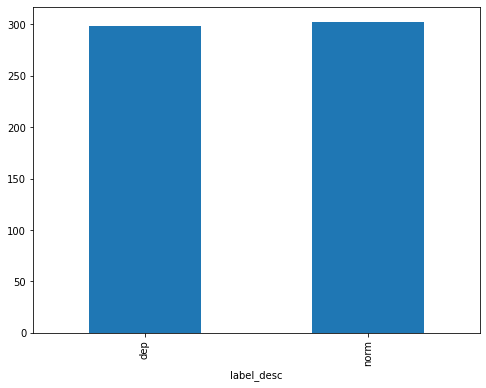

In [124]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_600.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_600['label_desc'].value_counts())
plt.show()

In [125]:
df_0 = pd.concat([df_600, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1800, 53475)

In [126]:
X_train = features[:600]
vali_X = features[600:800] # altogether 200 posts in validation set
y_train = labels[:600]
vali_Y = labels[600:800]
X_test = features[800:]
y_test = labels[800:]
# print(type(X_test))

f1_600 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.9326424870466321
Grid: {'C': 1}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=1)
Accuracy Score : 0.94
Precision Score : 0.9621848739495799
Recall Score : 0.916
F1 Score : 0.9385245901639345


In [127]:
########################### Data Size = 700 ##################################

norm    351
dep     349
Name: label_desc, dtype: int64


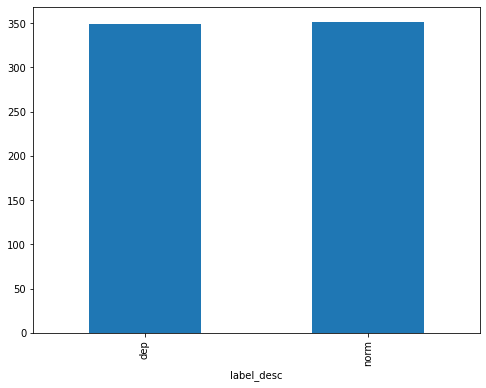

In [128]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_700.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_700['label_desc'].value_counts())
plt.show()

In [129]:
df_0 = pd.concat([df_700, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(1900, 54600)

In [130]:
X_train = features[:700]
vali_X = features[700:900] # altogether 200 posts in validation set
y_train = labels[:700]
vali_Y = labels[700:900]
X_test = features[900:]
y_test = labels[900:]
# print(type(X_test))

f1_700 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.9375
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.942
Precision Score : 0.9604166666666667
Recall Score : 0.922
F1 Score : 0.9408163265306122


In [131]:
########################### Data Size = 800 ##################################

norm    401
dep     399
Name: label_desc, dtype: int64


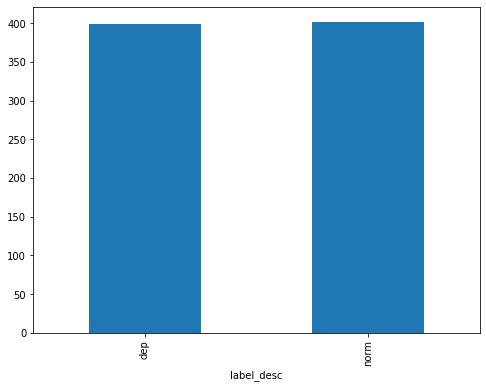

In [132]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_800.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_800['label_desc'].value_counts())
plt.show()

In [133]:
df_0 = pd.concat([df_800, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2000, 55961)

In [134]:
X_train = features[:800]
vali_X = features[800:1000] # altogether 200 posts in validation set
y_train = labels[:800]
vali_Y = labels[800:1000]
X_test = features[1000:]
y_test = labels[1000:]
# print(type(X_test))

f1_800 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.9375
Grid: {'C': 1}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=1)
Accuracy Score : 0.943
Precision Score : 0.9624217118997912
Recall Score : 0.922
F1 Score : 0.9417773237997957


In [135]:
########################### Data Size = 900 ##################################

dep     452
norm    448
Name: label_desc, dtype: int64


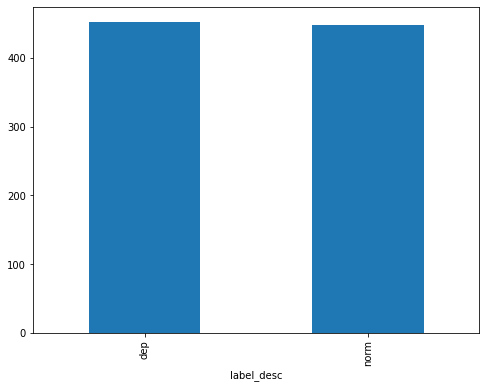

In [136]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_900.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_900['label_desc'].value_counts())
plt.show()

In [137]:
df_0 = pd.concat([df_900, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(2100, 57011)

In [138]:
X_train = features[:900]
vali_X = features[900:1100] # altogether 200 posts in validation set
y_train = labels[:900]
vali_Y = labels[900:1100]
X_test = features[1100:]
y_test = labels[1100:]
# print(type(X_test))

f1_900 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.9375
Grid: {'C': 1}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=1)
Accuracy Score : 0.944
Precision Score : 0.9625
Recall Score : 0.924
F1 Score : 0.942857142857143


In [139]:
########################### Data Size = 1800 ##################################

norm    900
dep     900
Name: label_desc, dtype: int64


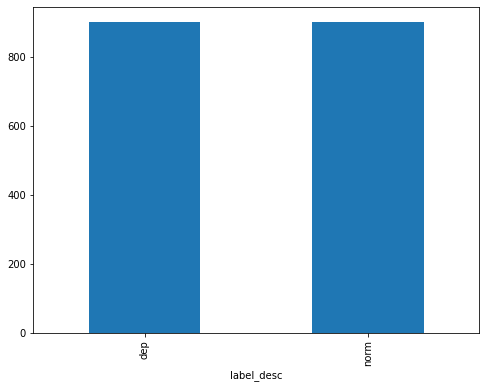

In [140]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_1800.groupby('label_desc').sentences.count().plot.bar(ylim=0)
print(df_1800['label_desc'].value_counts())
plt.show()

In [141]:
df_0 = pd.concat([df_1800, vali_df], axis=0)
df = pd.concat([df_0, test_df], axis=0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='UTF-8', ngram_range=(1, 2), token_pattern = r"(?u)\b\w+\b")
features = tfidf.fit_transform(df.sentences).toarray()
labels = df.category_id
features.shape #each of 5000 consumer complaint narratives is represented by 4503 features

(3000, 64204)

In [142]:
X_train = features[:1800]
vali_X = features[1800:2000] # altogether 200 posts in validation set
y_train = labels[:1800]
vali_Y = labels[1800:2000]
X_test = features[2000:]
y_test = labels[2000:]
# print(type(X_test))

f1_1800 = SVCmodel(X_train, y_train, vali_X, vali_Y, X_test, y_test)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Best score:  0.9430051813471503
Grid: {'C': 10}
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
####################################
By using SVC model, the best parameter and its evaluation metrics are:
Best parameters: LinearSVC(C=10)
Accuracy Score : 0.955
Precision Score : 0.972972972972973
Recall Score : 0.936
F1 Score : 0.9541284403669725


In [143]:
print(str(f1_10), "\n",
      str(f1_20), "\n",
      str(f1_30), "\n",
      str(f1_40), "\n",
      str(f1_50), "\n",
      str(f1_60), "\n",
      str(f1_70), "\n",
      str(f1_80), "\n",
      str(f1_90), "\n",
      str(f1_100), "\n",
      str(f1_200), "\n",
      str(f1_300), "\n",
      str(f1_400), "\n",
      str(f1_500), "\n",
      str(f1_1800))

0.6693440428380187 
 0.7038081805359663 
 0.8150627615062761 
 0.792544570502431 
 0.8596961572832886 
 0.8860055607043559 
 0.8947368421052632 
 0.8943396226415093 
 0.9047160731472571 
 0.9050387596899225 
 0.9201213346814965 
 0.9298067141403867 
 0.9363449691991785 
 0.9385245901639345 
 0.9541284403669725
